# Question 3

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [113]:
print list(cancer)
print X_train.shape

['target_names', 'data', 'target', 'DESCR', 'feature_names']
(426, 30)


## L2 Regularization

### a. Logistic Regression with C=1, C=100 and C = 0.001

In [120]:
l2_model1 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score for C=0.001: {:.3f}".format(l2_model1.score(X_train, y_train)))
print("Test set score for C=0.001: {:.3f}".format(l2_model1.score(X_test, y_test)))

Training set score for C=0.001: 0.923
Test set score for C=0.001: 0.937


In [121]:
l2_model2 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score for C=1: {:.3f}".format(l2_model2.score(X_train, y_train)))
print("Test set score for C=1: {:.3f}".format(l2_model2.score(X_test, y_test)))

Training set score for C=1: 0.953
Test set score for C=1: 0.958


In [122]:
l2_model3 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score for C=100: {:.3f}".format(l2_model3.score(X_train, y_train)))
print("Test set score for C=100: {:.3f}".format(l2_model3.score(X_test, y_test)))

Training set score for C=100: 0.972
Test set score for C=100: 0.965


Choose the best coefficient out of 3

### b.Confusion matrix for all 3 values of regularization

In [123]:
y_pred = l2_model1.predict(X_test)
print 'Confusion matrix for C=0.001'
print confusion_matrix(y_test, y_pred)

Confusion matrix for C=0.001
[[46  7]
 [ 2 88]]


In [127]:
y_pred = l2_model2.predict(X_test)
print 'Confusion matrix for C=1'
print confusion_matrix(y_test, y_pred)

Confusion matrix for C=1
[[48  5]
 [ 1 89]]


In [126]:
y_pred = l2_model3.predict(X_test)
print 'Confusion matrix for C=100'
print confusion_matrix(y_test, y_pred)

Confusion matrix for C=100
[[49  4]
 [ 1 89]]


### c. Names of the 3 attributes with the highest weights. 

In [131]:
print 'Model with L2 regularization with C := 0.001'
coef_list = l2_model1.coef_.T
for x in sorted(zip(coef_list, range(30)), reverse=True)[:3]:
    print 'The weight vector of {0} = {1}'.format(cancer.feature_names[x[1]],x[0][0])

Model with L2 regularization with C := 0.001
The weight vector of mean perimeter = 0.0992013594019
The weight vector of worst perimeter = 0.0554401945224
The weight vector of worst radius = 0.0251620634681


In [132]:
print 'Model with L2 regularization with C := 1'
coef_list = l2_model2.coef_.T
for x in sorted(zip(coef_list, range(30)), reverse=True)[:3]:
    print 'The weight vector of {0} = {1}'.format(cancer.feature_names[x[1]],x[0][0])

Model with L2 regularization with C := 1
The weight vector of mean radius = 1.87636895683
The weight vector of texture error = 1.23376817729
The weight vector of worst radius = 1.13867598765


In [133]:
print 'Model with L2 regularization with C := 100'
coef_list = l2_model3.coef_.T
for x in sorted(zip(coef_list, range(30)), reverse=True)[:3]:
    print 'The weight vector of {0} = {1}'.format(cancer.feature_names[x[1]],x[0][0])

Model with L2 regularization with C := 100
The weight vector of mean radius = 4.96409606659
The weight vector of texture error = 4.20342051603
The weight vector of concavity error = 1.30489339751


## L1 Regularization

With C=0.001, 1 and 100

In [135]:
l1_model1 = LogisticRegression(penalty='l1',C=0.001).fit(X_train, y_train)
l1_model2 = LogisticRegression(penalty='l1',C=1).fit(X_train, y_train)
l1_model3 = LogisticRegression(penalty='l1',C=100).fit(X_train, y_train)


print 'Score for C=0.001 is {:.3f}'.format(l1_model1.score(X_test, y_test))
print 'Score for C=1 is {:.3f}'.format(l1_model2.score(X_test, y_test))
print 'Score for C=100 is {:.3f}'.format(l1_model3.score(X_test, y_test))

Score for C=0.001 is 0.923
Score for C=1 is 0.958
Score for C=100 is 0.979


##### Comparing L1 and L2

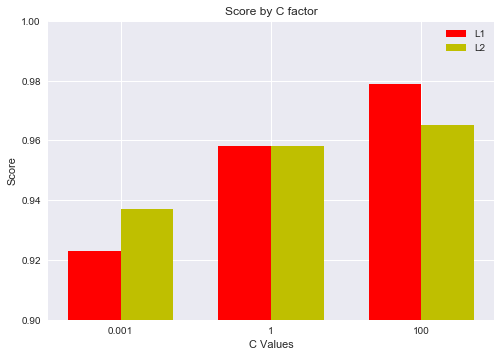

In [143]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
L1 = (0.923, 0.958, 0.979)
L2 = (0.937, 0.958,0.965)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, L1, width, color='r' )
rects2 = ax.bar(ind + width, L2, width, color='y')
ax.set_ylim([0.9, 1])

# add some text for labels, title and axes ticks
ax.set_ylabel('Score')
ax.set_title('Score by C factor')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('0.001', '1', '100'))
ax.set_xlabel('C Values')
ax.legend((rects1[0], rects2[0]), ('L1', 'L2'))
plt.show()

### e. Graph for both the L1 and L2 coefficients

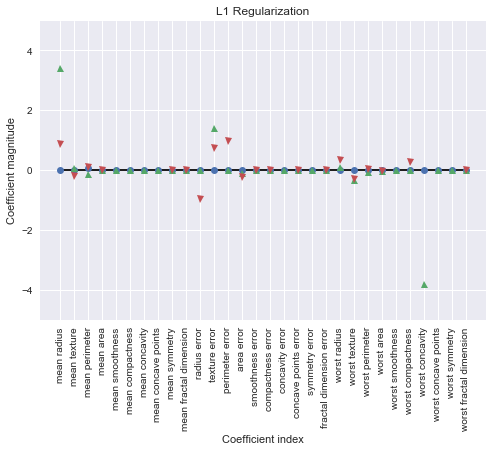

In [160]:
plt.plot(l1_model1.coef_.T, 'o', label="C=0.001")
plt.plot(l1_model2.coef_.T , '^', label="C=1")
plt.plot(l1_model3.coef_.T , 'v', label="C=100")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0, 0, cancer.data.shape[1]-1)
plt.ylim(-5, 5)
plt.title("L1 Regularization")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()
plt.legend()

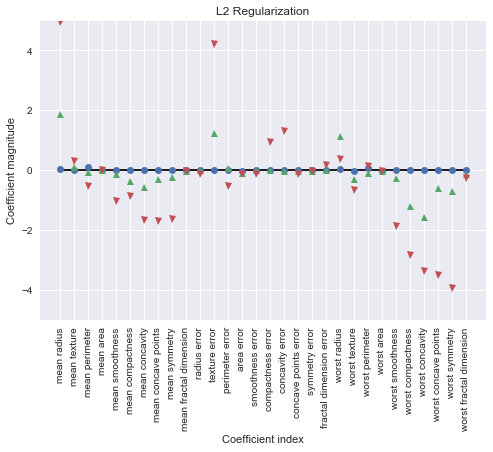

In [161]:
plt.plot(l2_model1.coef_.T, 'o', label="C=0.001")
plt.plot(l2_model2.coef_.T , '^', label="C=1")
plt.plot(l2_model3.coef_.T , 'v', label="C=100")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0, 0, cancer.data.shape[1]-1)
plt.ylim(-5, 5)
plt.title("L2 Regularization")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

### f. Difference between 2 graph